Morphological Transformations are some simple operations based on the image shape. They are normally performed on a binary image. A kernel is required to tell you how to change the value of any given pixel by combining it with different amounts of the neighbouring pixels.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

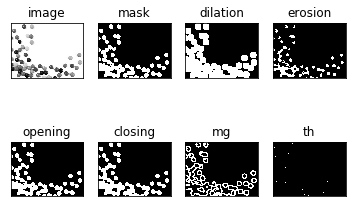

In [2]:
img = cv2.imread('Smarties.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)

kernal = np.ones((5,5), np.uint8) # To create a mask structure (rectangle shape in this case)  #np.ones will create a white mask of (5,5) size 

dilation = cv2.dilate(mask, kernal, iterations=2) # Used to remove the black dots

erosion = cv2.erode(mask, kernal, iterations=1) 

opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal) # In this method first erosion is performed and then dilation.

closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal) #In this method first dilation is performed and then erosion. 

mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal) # morphological gradient   #It is the difference b/w dialation and erosion
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal) # top hat    # It is the difference b/w the image and the opening of an image.

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()